In [1]:
import sympy as sp

In [2]:
# pour avoir un affichage plus joli des expressions
sp.init_printing()

In [3]:
# pour remplacer print afin d'afficher le latex
from IPython.display import display

In [4]:
# création d'un symbole avec des hypothèse sur l'objet qu'il représente
a = sp.Symbol("a", real=True, positive=True)

In [5]:
a

/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: Matpl

In [7]:
# pour ignorer les warnings venant de IPython
import warnings
warnings.filterwarnings("ignore", module="IPython")

In [8]:
b = sp.Symbol("b", real=True, positive=True)

In [9]:
b

In [29]:
# pour voir l'ensemble des hypothèses
b.assumptions0

{'real': True,
 'extended_real': True,
 'commutative': True,
 'imaginary': False,
 'complex': True,
 'hermitian': True,
 'finite': True,
 'infinite': False,
 'positive': True,
 'extended_negative': False,
 'extended_nonpositive': False,
 'negative': False,
 'zero': False,
 'nonzero': True,
 'extended_nonzero': True,
 'extended_positive': True,
 'extended_nonnegative': True,
 'nonpositive': False,
 'nonnegative': True}

In [11]:
# pour remplacer repr afin de débogguer les objets sympy
sp.srepr(b)

"Symbol('b', real=True, positive=True)"

In [12]:
d = sp.Symbol("d", real=True)
d

In [25]:
q0, q1, q2 = sp.symbols("q_0 q_1 q_2", real=True, nonnegative=True)
display(q0, q1, q2)

In [27]:
u = a * q1 + a * q2 - (b * q1 ** 2 + 2 * d* q1 * q2 + b * q2 ** 2) / 2 + q0
u

In [16]:
type(u)

sympy.core.add.Add

In [17]:
sp.srepr(u)

"Add(Mul(Symbol('a', real=True, positive=True), Symbol('q_1', real=True, positive=True)), Mul(Symbol('a', real=True, positive=True), Symbol('q_2', real=True, positive=True)), Mul(Integer(-1), Rational(1, 2), Symbol('b', real=True, positive=True), Pow(Symbol('q_1', real=True, positive=True), Integer(2))), Mul(Integer(-1), Rational(1, 2), Symbol('b', real=True, positive=True), Pow(Symbol('q_2', real=True, positive=True), Integer(2))), Mul(Integer(-1), Symbol('d', real=True), Symbol('q_1', real=True, positive=True), Symbol('q_2', real=True, positive=True)), Symbol('q_0', real=True, positive=True))"

In [19]:
with open("graphe_utilite.dot", "w") as fichier:
    fichier.write(sp.printing.dotprint(u))

In [20]:
%%sh
dot -Tsvg "graphe_utilite.dot" > utilite.svg

<img src="./utilite.svg"/>

In [26]:
R, p1, p2 = sp.symbols("R p_1 p_2", real=True, nonnegative=True)
display(R, p1, p2)

In [28]:
# contrainte
c = R - q0 - p1 * q1 - p2 * q2
c

In [24]:
# pour obtenir le latex correspondant à une expression
print(sp.latex(u))

a q_{1} + a q_{2} - \frac{b q_{1}^{2}}{2} - \frac{b q_{2}^{2}}{2} - d q_{1} q_{2} + q_{0}


Pour prouver que le problème a un sens on peut procéder de deux façons:
1. on maximise une fonction continu sur un compact!
2. on trouve un point critique et la fonction est concave!

On va ici utiliser la deuxième méthode.

In [31]:
hessienne = sp.hessian(u, [q0, q1, q2])
display(hessienne)

⎡0  0   0 ⎤
⎢         ⎥
⎢0  -b  -d⎥
⎢         ⎥
⎣0  -d  -b⎦

In [37]:
# définie négative?
hessienne.is_negative_definite

False

In [38]:
# juste négative?
hessienne.is_negative_semidefinite

L'absence de réponse dans le deuxième cas vient de ce que l'on a pas injecté l'hypothèse $b>|d|>0$ dans le problème jusqu'à présent.
On peut 
1. Reprendre la forme du problème pour injecter cette connaissance.
2. Faire la réduction de Gauss de la forme quadratique associée à la hessienne.

On va utiliser la deuxième méthode ici.

In [53]:
Q, R = hessienne.QRdecomposition()

In [54]:
Q

⎡     0      ⎤
⎢            ⎥
⎢    -b      ⎥
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎢╲╱  b  + d  ⎥
⎢            ⎥
⎢    -d      ⎥
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎣╲╱  b  + d  ⎦

In [55]:
R

⎡      _________              ⎤
⎢     ╱  2    2      2⋅b⋅d    ⎥
⎢0  ╲╱  b  + d    ────────────⎥
⎢                    _________⎥
⎢                   ╱  2    2 ⎥
⎣                 ╲╱  b  + d  ⎦

In [56]:
Q * R 

⎡0  0      0    ⎤
⎢               ⎥
⎢           2   ⎥
⎢       -2⋅b ⋅d ⎥
⎢0  -b  ────────⎥
⎢        2    2 ⎥
⎢       b  + d  ⎥
⎢               ⎥
⎢             2 ⎥
⎢       -2⋅b⋅d  ⎥
⎢0  -d  ────────⎥
⎢        2    2 ⎥
⎣       b  + d  ⎦

In [63]:
R_aug = R.col_join(sp.zeros(2, 3))
R_aug

⎡      _________              ⎤
⎢     ╱  2    2      2⋅b⋅d    ⎥
⎢0  ╲╱  b  + d    ────────────⎥
⎢                    _________⎥
⎢                   ╱  2    2 ⎥
⎢                 ╲╱  b  + d  ⎥
⎢                             ⎥
⎢0       0             0      ⎥
⎢                             ⎥
⎣0       0             0      ⎦

**A Reprendre**

La fonction $u$ est bien concave.

In [67]:
l0, l1, l2, l3 = sp.symbols(
    "\lambda_0 \lambda_1 \lambda_2 \lambda_3",
    real=True,
    nonnegative=True,
)
display(l0, l1, l2, l3)

In [68]:
L = u + l0 * q0 + l1 * q1 + l2 * q2 + l3 * c
display(L)

In [69]:
gradient = [sp.diff(L, v) for v in (l0, l1, l2, l3, q0, q1, q2)]
display(gradient)

In [70]:
sp.solve(gradient, l0, l1, l2, l3, q0, q1, q2)

In [71]:
L3 = L.subs({l0: 0, l1: 0, l2: 0})
L3

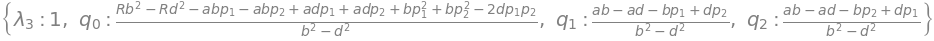

In [72]:
sp.solve([L3.diff(v) for v in (q0, q1, q2, l3)], q0, q1, q2, l3)

**Exercice**

Il va falloir faire toutes les combinaisons possibles de saturations de contraintes, résoudre pour chaque combinaison le système de point critique du lagrangien puis faire la réunion des solution.

In [73]:
import itertools as it

In [78]:
for combi in it.product(*[(True, False) for _ in range(4)]):
    print(combi)

(True, True, True, True)
(True, True, True, False)
(True, True, False, True)
(True, True, False, False)
(True, False, True, True)
(True, False, True, False)
(True, False, False, True)
(True, False, False, False)
(False, True, True, True)
(False, True, True, False)
(False, True, False, True)
(False, True, False, False)
(False, False, True, True)
(False, False, True, False)
(False, False, False, True)
(False, False, False, False)


In [79]:
from copy import deepcopy

In [84]:
solutions = list()
for combi in it.product(*[(True, False) for _ in range(4)]):
    Lc = deepcopy(L)
    variables = [q0, q1, q2]
    for choix, la in zip(combi, (l0, l1, l2, l3)):
        if not choix:
            Lc = Lc.subs(la, 0)
        else:
            variables.append(la)
    #display(Lc)
    #display(variables)
    solutions.append(sp.solve([Lc.diff(var) for var in variables], *variables))
    

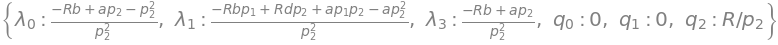

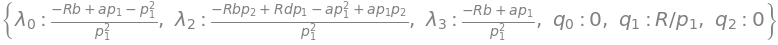

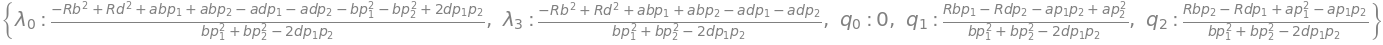

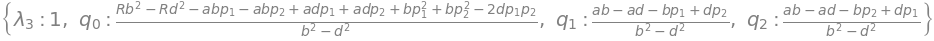

In [86]:
display(*solutions)

In [96]:
uu = sp.Symbol("u", function=True)
valeurs = list()
for sol in solutions:
    if sol:
        valeurs.append({
            q0: sol[q0], 
            q1: sol[q1], 
            q2: sol[q2], 
            uu: u.subs(sol).simplify()
        })
        


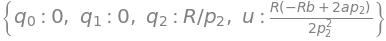

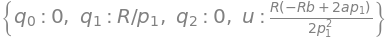

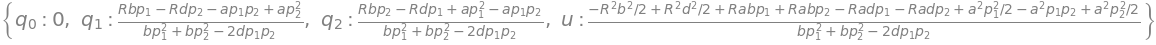

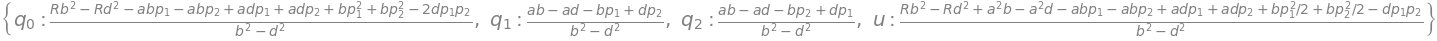

In [97]:
display(*valeurs)